In [ ]:
###command line setup
#
#source venv/bin/activate
#pip install ipykernel
#python -m ipykernel install --user --name=gintastic
#pip install -r requirements.txt
#jupyter nbextension enable --py widgetsnbextension
#pip install Pillow --upgrad

# Download Images

In [35]:
from fastai.vision import *
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import pandas as pd
import numpy as np
import pickle

In [40]:
classes = ["Tommyrotter American Gin",
"Beefeater London Dry Gin",
"Rabbit Hole London Dry Gin",
"Gray Whale Gin",
"Hendrick's Orbium Gin",
"Brockmans Intensely Smooth Gin",
"Bobby's Schiedam Dry Gin",
"Oxley Cold Distilled London Dry Gin",
"Suntory Roku Gin",
"Nikka Coffey Gin",
"Freeland Spirits Gin",
"Hendrick's Midsummer Solstice Gin",
"Hardshore Original Gin",
"Magellan Gin",
"Glendalough Rose Gin",
"Boodles Mulberry Gin",
"Boodles British Gin",
"Journeyman Bilberry Black Hearts Gin",
"Boodles Rhubarb & Strawberry Gin",
"Empress 1908 Indigo Gin",
"Chase GB Gin",
"Highclere Castle Gin",
"Dry Town Gin",
"Hepple Gin",
"Bobby's Schiedam Jenever Dry Gin",
"Downton Abbey Gin",
"Elephant London Dry Gin",
"Elephant Gin Elephant Strength",
"Harahorn Gin",
"Adirondack ADK Gin",
"Spirit Works Sloe Gin",
"Hendrick's Gin",
"Few Barrel Gin",
"Anchor Old Tom Gin",
"Cotswolds Dry Gin",
"Black Button Citrus Forward Gin",
"Beefeater Burrough's Reserve Oak Rested Gin",
"Knickerbocker Blueberry Gin",
"Stirk's Small Batch Aged Gin",
"ESP American Beauty Gin",
"Dingle Original Pot Still Gin",
"Citadelle Gin",
"Aviation American Gin",
"Bluecoat Barrel Finished American Dry Gin",
"Koval Dry Gin",
"Corsair Gin-Head Style American Gin",
"Plymouth Sloe Gin",
"Sipsmith Sloe Gin",
"Drumshanbo Gunpowder Irish Gin",
"Tanqueray Rangpur Gin",
"Reisetbauer Sloeberry Sloe Gin",
"Koval Barreled Gin",
"Breckenridge Gin",
"Sipsmith V.J.O.P. London Dry Gin",
"Plymouth Navy Strength Gin",
"Malfy Gin Con Limone",
"Bertha's Revenge Small Batch Irish Milk Gin",
"Glendalough Wild Botanical Gin",
"Four Pillars Bloody Shiraz Gin",
"Chief Gowanus Traditional New Netherland Gin",
"Gin Lane 1751 Small Batch Victoria Pink Gin",
"Gordon's Pink Gin",
"Cadenhead's Old Raj Dry Gin",
"Beefeater London Dry Gin 24",
"1911 Spirits Gin",
"Anchor Junipero Gin",
"Barr Hill Gin",
"Barr Hill Tom Cat Reserve Gin",
"Bourbon Barreled Big Gin",
"Big Gin",
"Bluecoat American Dry Gin",
"Bootlegger 21 New York Gin",
"Botanica Spiritvs Gin",
"Breuckelen Glorious Gin",
"Brooklyn Small Batch Gin",
"Bummer and Lazarus Dry Gin",
"Citadelle Reserve 2013 Gin",
"City of London Dry Gin",
"Comb Jarhead Gin",
"Corsair Barrel Aged Gin",
"Curious Gin",
"Dorothy Parker Gin",
"Dry Fly Gin",
"Far North Spirits Solveig Gin",
"Few American Gin",
"Few Standard Issue Gin",
"Fifty Pounds London Dry Gin",
"Greenhook Ginsmiths American Dry Gin",
"Greenhook Ginsmiths Beach Plum Gin Liqueur",
"Greenhook Ginsmiths Old Tom Gin",
"Jensen's London Distilled Old Tim Gin",
"Knickerbocker Gin",
"Monkey 47 Schwarzwald Dry Gin",
"No 209 Gin",
"Prairie Organic Gin",
"Ransom Old Tom Gin",
"Spring44 Old Tom Gin",
"The Bitter Truth Pink Gin",
"The Botanist Islay Dry Gin",
"Catoctin Creek Watershed Gin",
"Aria Portland Dry Gin",
"KI NO BI Kyoto Dry Gin",
"Distiller's Gin No. 6 brand",
"Jensen's London Distilled Dry Bermondsey Gin",
"Queens Courage New York Old Tom Gin",
"Roundhouse Imperial Barrel Aged Gin",
"Roundhouse Gin",
"Silvertip American Dry Gin",
           
##Adding bottles sourced on my own
"Blue Bottle Gin",
"Deviation Citrus Rose Gin",
"Deviation Mountain Herb Gin",
"Deviation Spice Trade Gin"]

           

#convert all classest to lower case
classes = [x.lower() for x in classes]

#sort them alphabetically
classes.sort() 

#save list of classes for future use 
print(len(classes))
gin_dict = pd.DataFrame(classes)
gin_dict.columns = ["gin"]
gin_dict.to_csv("../gin_classes.csv", index=False)

classes[:3]

112


['1911 spirits gin', 'adirondack adk gin', 'anchor junipero gin']

In [3]:
##make directories for each class
#path = Path('data/')
#
#for c in classes:
#    folder = c
#    dest = path/folder
#    dest.mkdir(parents=True, exist_ok=True)

Go to [Google Images](http://images.google.com) and search for the images you are interested in. 

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

Use this chrome extension to download the images.
https://chrome.google.com/webstore/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm?hl=en

Rename and upload these files into the right folders you created in the data directory.

In [4]:
##remove files you can't open
#path = 'data/'
#for c in classes:
#    print(c)
#    verify_images(path+c, delete=True, max_size=500)

# View Data

In [5]:
path = Path('data/')

np.random.seed(0)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

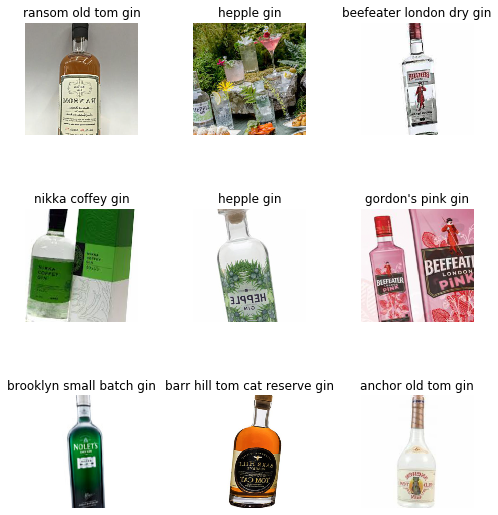

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes

['1911 spirits gin',
 'adirondack adk gin',
 'anchor junipero gin',
 'anchor old tom gin',
 'aria portland dry gin',
 'aviation american gin',
 'barr hill gin',
 'barr hill tom cat reserve gin',
 "beefeater burrough's reserve oak rested gin",
 'beefeater london dry gin',
 'beefeater london dry gin 24',
 "bertha's revenge small batch irish milk gin",
 'big gin',
 'black button citrus forward gin',
 'blue bottle gin',
 'bluecoat american dry gin',
 'bluecoat barrel finished american dry gin',
 "bobby's schiedam dry gin",
 "bobby's schiedam jenever dry gin",
 'boodles british gin',
 'boodles mulberry gin',
 'boodles rhubarb and strawberry gin',
 'bootlegger 21 new york gin',
 'botanica spiritvs gin',
 'bourbon barreled big gin',
 'breckenridge gin',
 'breuckelen glorious gin',
 'brockmans intensely smooth gin',
 'brooklyn small batch gin',
 'bummer and lazarus dry gin',
 "cadenhead's old raj dry gin",
 'catoctin creek watershed gin',
 'chase gb gin',
 'chief gowanus traditional new nether

In [8]:
print("Number of classes", data.c)

Number of classes 102


In [9]:
print("Training observations", len(data.train_ds))
print("Validation observations", len(data.valid_ds))

Training observations 6709
Validation observations 1677


# Train model

In [10]:
bottle_recognizer = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
bottle_recognizer.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.408612,1.374364,0.295766,00:56
1,1.687257,0.957895,0.208110,00:56
2,1.114134,0.822440,0.174717,00:55
3,0.891573,0.796254,0.164580,00:54


In [12]:
bottle_recognizer.save('stage-1')

In [13]:
bottle_recognizer.unfreeze()

In [14]:
bottle_recognizer.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


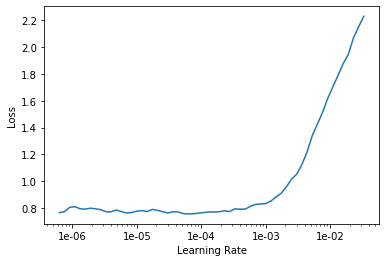

In [15]:
bottle_recognizer.recorder.plot()

In [16]:
bottle_recognizer.fit_one_cycle(5, max_lr=slice(1e-045,1e-035))

epoch,train_loss,valid_loss,error_rate,time
0,0.820330,0.796227,0.161002,01:12
1,0.825345,0.800488,0.164580,01:12
2,0.811927,0.795509,0.163983,01:12
3,0.788170,0.796521,0.163983,01:12
4,0.818423,0.795501,0.163983,01:13


In [17]:
bottle_recognizer.save('stage-2')

# Evaluation

In [18]:
bottle_recognizer.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(bottle_recognizer)

In [20]:
interp.confusion_matrix()

array([[ 6,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  3,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0, 16,  0, ...,  0,  0,  0,  0],
       [ 0,  0,  0,  6, ...,  0,  1,  0,  0],
       ...,
       [ 0,  0,  0,  0, ..., 28,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0, 21,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0, 20,  0],
       [ 0,  0,  0,  0, ...,  0,  0,  0,  3]])

In [21]:
interp.most_confused()

[('big gin', 'bourbon barreled big gin', 6),
 ('glendalough wild botanical gin', 'glendalough rose gin', 4),
 ('bluecoat barrel finished american dry gin', 'bluecoat american dry gin', 3),
 ("bobby's schiedam jenever dry gin", "bobby's schiedam dry gin", 3),
 ('glendalough rose gin', 'glendalough wild botanical gin', 3),
 ('anchor junipero gin', 'barr hill gin', 2),
 ('barr hill tom cat reserve gin', 'barr hill gin', 2),
 ('beefeater london dry gin 24', 'beefeater london dry gin', 2),
 ("bertha's revenge small batch irish milk gin",
  'elephant gin elephant strength',
  2),
 ('black button citrus forward gin',
  'chief gowanus traditional new netherland gin',
  2),
 ('bluecoat american dry gin', 'brooklyn small batch gin', 2),
 ("bobby's schiedam dry gin", "bobby's schiedam jenever dry gin", 2),
 ('boodles british gin', 'dingle original pot still gin', 2),
 ('boodles rhubarb and strawberry gin', 'boodles mulberry gin', 2),
 ('catoctin creek watershed gin', 'roundhouse imperial barrel a

# Spot check it

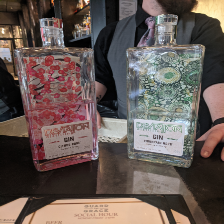

In [22]:
#img = open_image('data/blue bottle gin/blue-bottle-dry-gin0.jpg')
#img = open_image('data/deviation mountain herb gin/image11.jpeg')
img = open_image('test_data/guard_and_grace.jpg')
img.resize(224)
img

In [23]:
pred_class,_, probs_tensor = bottle_recognizer.predict(img)
pred_class

Category deviation citrus rose gin

In [24]:

#pretty print
vision_results = pd.DataFrame([probs_tensor.numpy(), data.classes]).T
vision_results.columns = ["score", "gin"]
vision_results.score = vision_results.score.astype(float).round(5)
vision_results.sort_values("score", ascending=False, inplace=True)
print(vision_results.head(5))

#fast for prod
top5 =  probs_tensor.numpy().argsort()[-5:][::-1]
results = [data.classes[i] for i in top5]
results

      score                          gin
39  0.20682    deviation citrus rose gin
40  0.11382  deviation mountain herb gin
51  0.09391             few american gin
47  0.07157      elephant london dry gin
20  0.05551         boodles mulberry gin


['deviation citrus rose gin',
 'deviation mountain herb gin',
 'few american gin',
 'elephant london dry gin',
 'boodles mulberry gin']

# Export and reload a saved model

In [25]:
bottle_recognizer.path #this is path where your model is

PosixPath('data')

In [26]:
#save it 
bottle_recognizer.export() #To create the Learner for inference, you'll need to use the load_learner function. Note that you don't have to specify anything: it remembers the classes, the transforms you used or the normalization in the data, the model, its weigths... The only argument needed is the folder where the 'export.pkl' file is.

In [27]:
#make it running on a GPU
defaults.device = torch.device('cpu')
#load it
bottle_recognizer = load_learner(path="data") #load it.
#get a prediction
bottle_recognizer.predict(img) #predict it

(Category deviation citrus rose gin,
 tensor(39),
 tensor([2.9136e-04, 1.5824e-02, 1.7160e-03, 6.6253e-04, 3.3092e-05, 2.3630e-03,
         5.1076e-05, 2.7307e-05, 6.8542e-03, 3.1593e-03, 3.1483e-03, 5.5576e-03,
         5.1756e-04, 1.4109e-04, 2.4138e-02, 3.7863e-03, 2.7546e-03, 3.4925e-03,
         1.5694e-02, 1.6115e-02, 5.5509e-02, 1.8082e-03, 3.3228e-02, 1.7433e-03,
         1.1051e-04, 1.5407e-03, 3.5986e-04, 1.3141e-03, 2.2192e-02, 1.1085e-03,
         5.4180e-04, 5.9621e-03, 1.0484e-03, 4.6007e-05, 6.3429e-04, 2.1020e-04,
         3.8061e-05, 4.5902e-04, 5.4927e-04, 2.0682e-01, 1.1382e-01, 4.0890e-03,
         2.6597e-03, 1.6547e-02, 1.3937e-03, 2.0379e-03, 1.8771e-02, 7.1569e-02,
         9.6305e-04, 1.5181e-04, 5.5326e-04, 9.3906e-02, 2.7810e-03, 2.7171e-03,
         1.7680e-04, 5.1372e-04, 8.7207e-04, 1.5944e-02, 1.3359e-02, 1.7173e-03,
         1.5621e-03, 2.2551e-03, 4.5920e-04, 2.8620e-04, 4.8046e-03, 1.8762e-02,
         1.6639e-02, 4.3630e-03, 5.5182e-02, 2.4929e-03, 3.

In [ ]:
#use case
Gin lover takes a picture of their gin bottle. 
Modle detects the type of gin. 
They can say this is my gin, show me othe roptions
Show them the next 5 gins
They can pick one of those or choose to create a new gin profile using the picture they took.

1. If they select a gin predicted, they can rate, review, add to wishlist and add to library
2. If they select create a new gin profile then must fill out the name and create the profile before rating, reviewing, addign to wishlist and library.
Done!

#TODO. retrain periodically as you collect better andorid photo data.